#Libraries

In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.model_selection import train_test_split, StratifiedKFold
from sklearn.metrics import (
    accuracy_score, f1_score, precision_score, recall_score, roc_auc_score,
    confusion_matrix, roc_curve, precision_recall_curve, auc
)

import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import joblib
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import f1_score, precision_score, recall_score, accuracy_score, roc_auc_score, confusion_matrix, precision_recall_curve, roc_curve, auc
from tensorflow.keras.callbacks import EarlyStopping
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping


#Data

In [ ]:
data = joblib.load('/content/drive/MyDrive/Bankruptcy Prediction Data/Prepared Dataset for Thesis/Dataset.pkl')
print(data.head())

X = data.drop(columns=['result'])
y = data['result']

   Profitability Ratios (Return from Sales) EBIT/Sales last avail. Year  \
0                                           1.281861                      
1                                           0.022043                      
2                                           3.210585                      
3                                          51.385155                      
4                                          37.085847                      

   Profitability Ratios (Return from Sales) EBIT/Sales last year -1  \
0                                          -0.073507                  
1                                          -0.027587                  
2                                          -2.198620                  
3                                          -2.196863                  
4                                          -2.354131                  

   Profitability Ratios (Return from Sales) EBIT/Sales last year -2  \
0                                           0.03703

In [ ]:
data.shape

(255919, 61)

In [ ]:

# Splitting data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, stratify=y, random_state=42)

# Standardize the data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


#Cross Validation

In [ ]:
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

#def

In [ ]:
import tensorflow as tf

def f1_score_metric(y_true, y_pred):
    # Convert both y_true and y_pred to float32
    y_true = tf.cast(y_true, tf.float32)
    y_pred = tf.round(y_pred)  # Convert probabilities to binary predictions (0 or 1)
    y_pred = tf.cast(y_pred, tf.float32)

    # Compute true positives, false positives, and false negatives
    tp = tf.reduce_sum(y_true * y_pred)
    fp = tf.reduce_sum((1 - y_true) * y_pred)
    fn = tf.reduce_sum(y_true * (1 - y_pred))

    # Precision and recall
    precision = tp / (tp + fp + tf.keras.backend.epsilon())
    recall = tp / (tp + fn + tf.keras.backend.epsilon())

    # F1 score
    f1 = 2 * (precision * recall) / (precision + recall + tf.keras.backend.epsilon())
    return f1


In [ ]:
from tensorflow.keras import Sequential, Input
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam

def create_nn(units_1, dropout_1, n_layers, units_2, dropout_2, learning_rate, input_dim):
    model = Sequential()

    model.add(Input(shape=(input_dim,)))
    model.add(Dense(units_1, activation='relu'))
    model.add(Dropout(dropout_1))
    for _ in range(n_layers - 1):
        model.add(Dense(units_2, activation='relu'))
        model.add(Dropout(dropout_2))
    model.add(Dense(1, activation='sigmoid'))  # Binary classification output
    model.compile(optimizer=Adam(learning_rate=learning_rate),
                  loss='binary_crossentropy',
                  metrics=[f1_score_metric])
    return model


#parameters

In [ ]:
#hyperparameters based on Optuna results
best_hyperparameters = {
    'units_1': 128,
    'dropout_1': 0.2,
    'n_layers': 1,
    'units_2': 96,
    'dropout_2': 0.5,
    'learning_rate': 0.0006448191978189127
}


Training Neural Network: Fold 1
800/800 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
Training Neural Network: Fold 2
800/800 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
Training Neural Network: Fold 3
800/800 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
Training Neural Network: Fold 4
800/800 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
Training Neural Network: Fold 5
800/800 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
Mean Threshold for Neural Network: 0.35

Cross-validation Metrics for Neural Network:
  Fold 1:
    Accuracy: 0.9371
    Precision: 0.7023
    Recall: 0.7504
    F1: 0.7255
    ROC AUC: 0.9560
    PR AUC: 0.7914
    Class Accuracies: {'non_bankrupt': 0.9603621023026894, 'bankrupt': 0.7503526093088858}
  Fold 2:
    Accuracy: 0.9358
    Precision: 0.7104
    Recall: 0.7109
    F1: 0.7106
    ROC AUC: 0.9519
    PR AUC: 0.7767
    Class Accuracies: {'non_bankrupt': 0.9638776586394797, 'bankrupt': 0.7108603667136812}
  Fold 3:
    Accuracy: 0.9369
    Precision: 0.7170
    Recall: 0.7112
    F1: 0.7141
    ROC AUC: 0.9549
    PR A

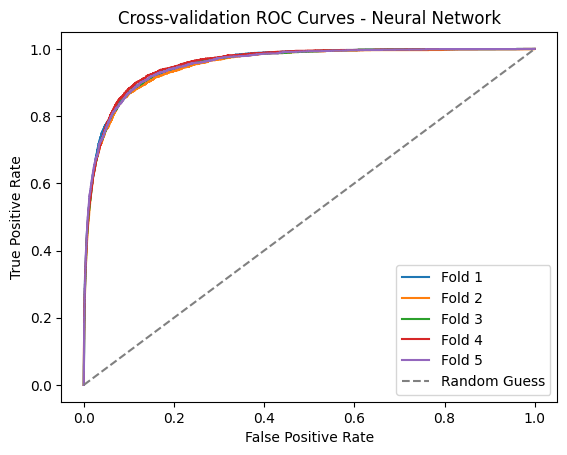

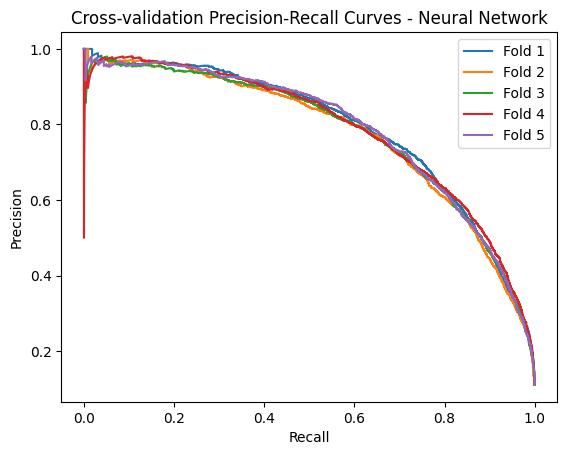


Final Training for Neural Network
Epoch 1/20
1000/1000 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - f1_score_metric: 0.5101 - loss: 0.2606
Epoch 2/20
 115/1000 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - f1_score_metric: 0.6373 - loss: 0.1872

/usr/local/lib/python3.10/dist-packages/keras/src/callbacks/early_stopping.py:155: UserWarning: Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: f1_score_metric,loss
  current = self.get_monitor_value(logs)


1000/1000 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - f1_score_metric: 0.6233 - loss: 0.1846
Epoch 3/20
1000/1000 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - f1_score_metric: 0.6316 - loss: 0.1755
Epoch 4/20
1000/1000 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - f1_score_metric: 0.6481 - loss: 0.1698
Epoch 5/20
1000/1000 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - f1_score_metric: 0.6535 - loss: 0.1682
Epoch 6/20
1000/1000 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - f1_score_metric: 0.6569 - loss: 0.1634
Epoch 7/20
1000/1000 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - f1_score_metric: 0.6626 - loss: 0.1595
Epoch 8/20
1000/1000 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - f1_score_metric: 0.6654 - loss: 0.1597
Epoch 9/20
1000/1000 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - f1_score_metric: 0.6640 - loss: 0.1601
Epoch 10/20
1000/1000 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - f1_score_metric: 0.6737 - loss: 0.1554
Epoch 11/20
1000/1000 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - f1_score_metric: 0.6799 - loss: 0.1577
Epoch 12/20
1000/1000 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - f1

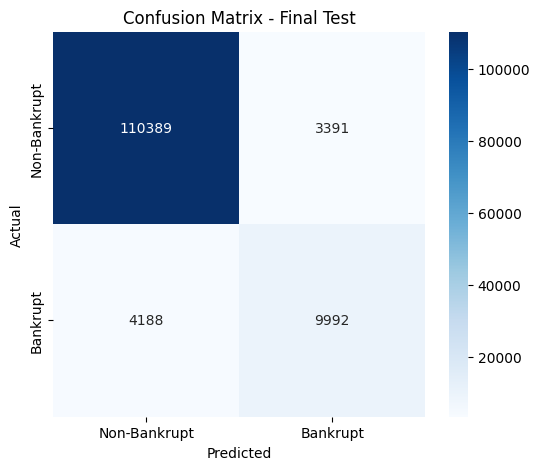

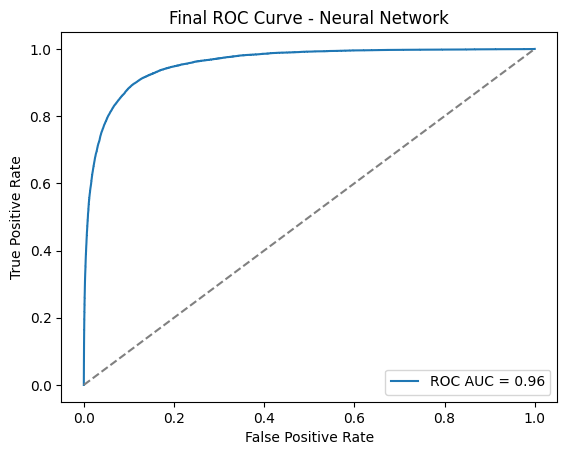

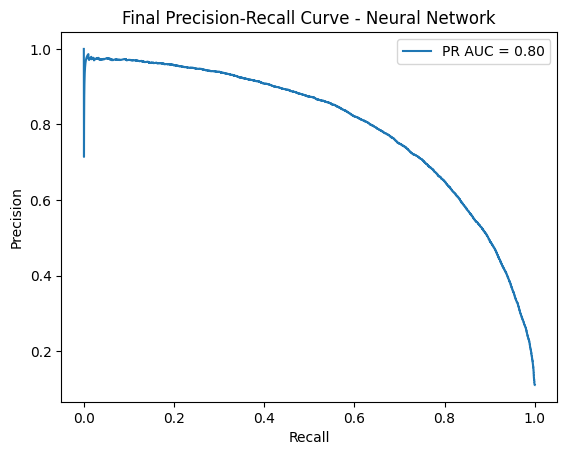

In [ ]:
# Initialize results storage
cv_results = {}
roc_curves_cv = {}
pr_curves_cv = {}

# Initialize for Neural Network
cv_results['Neural Network'] = []
roc_curves_cv['Neural Network'] = []
pr_curves_cv['Neural Network'] = []

thresholds = []

# Cross-validation
for fold_idx, (train_index, val_index) in enumerate(cv.split(X_train, y_train)):
    print(f"Training Neural Network: Fold {fold_idx + 1}")

    X_fold_train, X_fold_val = X_train[train_index], X_train[val_index]
    y_fold_train, y_fold_val = y_train.values[train_index], y_train.values[val_index]

    # Create and train the model
    nn_model = create_nn(**best_hyperparameters, input_dim=input_dim)
    early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
    nn_model.fit(X_fold_train, y_fold_train, validation_data=(X_fold_val, y_fold_val),
                 epochs=20, batch_size=128, verbose=0, callbacks=[early_stopping])

    # Predict probabilities
    y_fold_proba = nn_model.predict(X_fold_val).flatten()

    # Find best threshold for F1
    best_threshold = 0.5
    best_f1 = 0
    for threshold in np.arange(0.1, 1.0, 0.01):
        y_fold_pred = (y_fold_proba >= threshold).astype(int)
        f1 = f1_score(y_fold_val, y_fold_pred)
        if f1 > best_f1:
            best_f1 = f1
            best_threshold = threshold

    thresholds.append(best_threshold)

    # Evaluate at best threshold
    y_fold_pred = (y_fold_proba >= best_threshold).astype(int)
    accuracy = accuracy_score(y_fold_val, y_fold_pred)
    precision = precision_score(y_fold_val, y_fold_pred)
    recall = recall_score(y_fold_val, y_fold_pred)
    f1 = f1_score(y_fold_val, y_fold_pred)
    roc_auc = roc_auc_score(y_fold_val, y_fold_proba)

    conf_matrix = confusion_matrix(y_fold_val, y_fold_pred)
    class_acc = {
        "non_bankrupt": conf_matrix[0, 0] / conf_matrix[0].sum(),
        "bankrupt": conf_matrix[1, 1] / conf_matrix[1].sum()
    }
    pr_curve_precision, pr_curve_recall, _ = precision_recall_curve(y_fold_val, y_fold_proba)
    pr_auc = auc(pr_curve_recall, pr_curve_precision)

    # Save metrics
    cv_results['Neural Network'].append({
        "Fold": fold_idx + 1,
        "Accuracy": accuracy,
        "Precision": precision,
        "Recall": recall,
        "F1": f1,
        "ROC AUC": roc_auc,
        "PR AUC": pr_auc,
        "Class Accuracies": class_acc
    })

    # Save ROC and PR curves
    fpr, tpr, _ = roc_curve(y_fold_val, y_fold_proba)
    roc_curves_cv['Neural Network'].append((fpr, tpr))
    pr_curves_cv['Neural Network'].append((pr_curve_precision, pr_curve_recall))

# Compute mean threshold
mean_threshold = np.mean(thresholds)
print(f"Mean Threshold for Neural Network: {mean_threshold:.2f}")

# Display Cross-validation Metrics
print(f"\nCross-validation Metrics for Neural Network:")
for fold_metrics in cv_results['Neural Network']:
    print(f"  Fold {fold_metrics['Fold']}:")
    for metric, value in fold_metrics.items():
        if metric != "Fold" and metric != "Class Accuracies":
            print(f"    {metric}: {value:.4f}")
    print(f"    Class Accuracies: {fold_metrics['Class Accuracies']}")

# Plot cross-validation ROC and PR curves
plt.figure()
for fold_idx, (fpr, tpr) in enumerate(roc_curves_cv['Neural Network']):
    plt.plot(fpr, tpr, label=f"Fold {fold_idx + 1}")
plt.plot([0, 1], [0, 1], linestyle="--", color="gray", label="Random Guess")
plt.title("Cross-validation ROC Curves - Neural Network")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend()
plt.show()

plt.figure()
for fold_idx, (precision, recall) in enumerate(pr_curves_cv['Neural Network']):
    plt.plot(recall, precision, label=f"Fold {fold_idx + 1}")
plt.title("Cross-validation Precision-Recall Curves - Neural Network")
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.legend()
plt.show()

# Final Model Training and Evaluation
final_results = {}
roc_curves_final = {}
pr_curves_final = {}

print("\nFinal Training for Neural Network")
final_nn_model = create_nn(**best_hyperparameters, input_dim=input_dim)
final_nn_model.fit(X_train, y_train, epochs=20, batch_size=128, verbose=1, callbacks=[early_stopping])

# Test Set Predictions
y_test_proba = final_nn_model.predict(X_test).flatten()
y_test_pred = (y_test_proba >= mean_threshold).astype(int)

# Test Metrics
accuracy = accuracy_score(y_test, y_test_pred)
precision = precision_score(y_test, y_test_pred)
recall = recall_score(y_test, y_test_pred)
f1 = f1_score(y_test, y_test_pred)
roc_auc = roc_auc_score(y_test, y_test_proba)

conf_matrix = confusion_matrix(y_test, y_test_pred)
class_acc = {
    "non_bankrupt": conf_matrix[0, 0] / conf_matrix[0].sum(),
    "bankrupt": conf_matrix[1, 1] / conf_matrix[1].sum()
}
pr_curve_precision, pr_curve_recall, _ = precision_recall_curve(y_test, y_test_proba)
pr_auc = auc(pr_curve_recall, pr_curve_precision)

# Save results
final_results['Neural Network'] = {
    "Accuracy": accuracy,
    "Precision": precision,
    "Recall": recall,
    "F1": f1,
    "ROC AUC": roc_auc,
    "PR AUC": pr_auc,
    "Class Accuracies": class_acc
}

# Display final metrics
print("\nFinal Test Metrics:")
for metric, value in final_results['Neural Network'].items():
    print(f"  {metric}: {value:.4f}" if isinstance(value, float) else f"  {metric}: {value}")

# Plot confusion matrix
plt.figure(figsize=(6, 5))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Non-Bankrupt', 'Bankrupt'],
            yticklabels=['Non-Bankrupt', 'Bankrupt'])
plt.title("Confusion Matrix - Final Test")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

# Plot final ROC curve
fpr, tpr, _ = roc_curve(y_test, y_test_proba)
plt.figure()
plt.plot(fpr, tpr, label=f"ROC AUC = {roc_auc:.2f}")
plt.plot([0, 1], [0, 1], linestyle="--", color="gray")
plt.title("Final ROC Curve - Neural Network")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend()
plt.show()

# Plot final PR curve
plt.figure()
plt.plot(pr_curve_recall, pr_curve_precision, label=f"PR AUC = {pr_auc:.2f}")
plt.title("Final Precision-Recall Curve - Neural Network")
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.legend()
plt.show()


PermutationExplainer explainer: 127961it [1:25:31, 24.91it/s]                            
/usr/local/lib/python3.10/dist-packages/shap/plots/_beeswarm.py:950: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all axes decorations.
  pl.tight_layout()


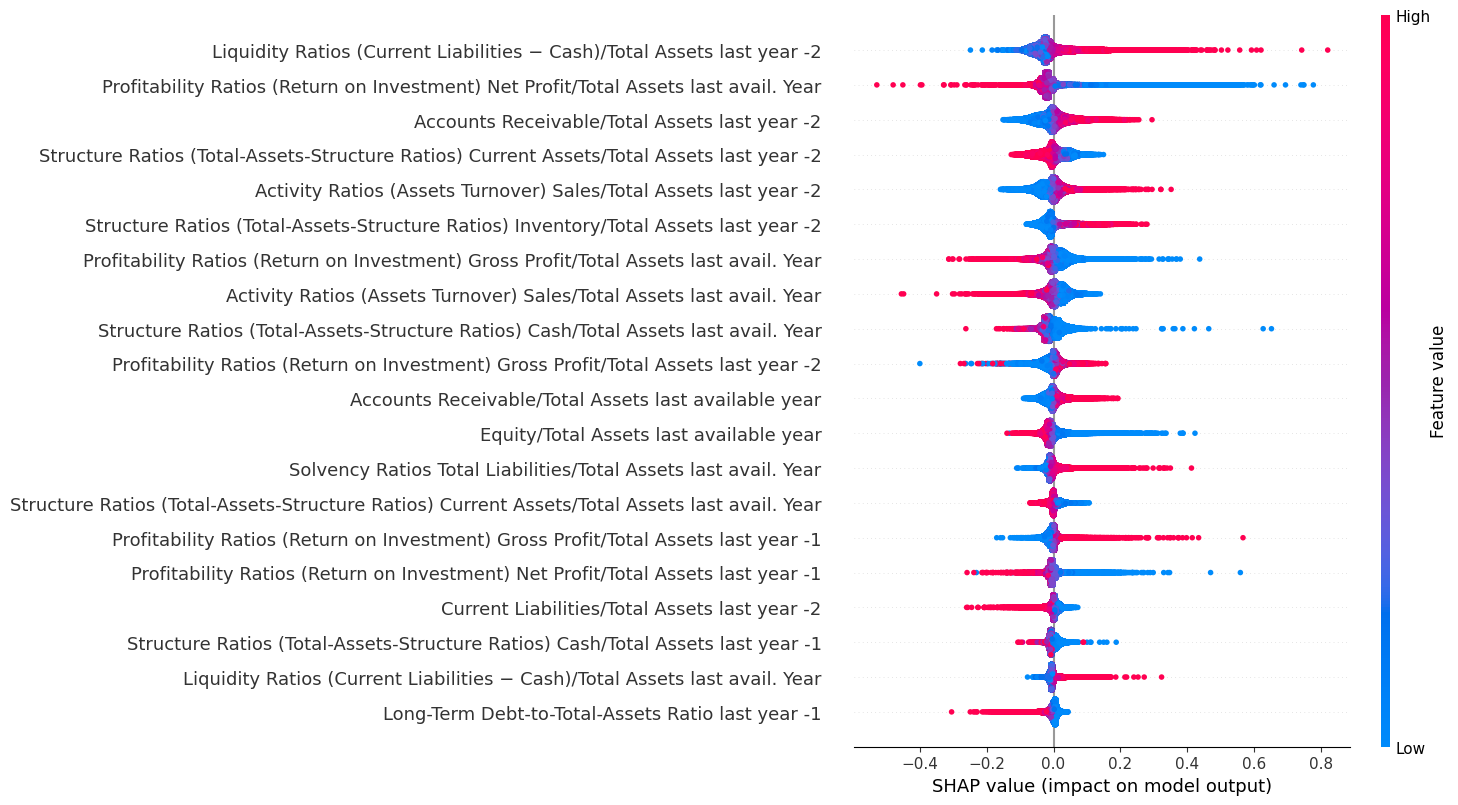

In [ ]:
import shap

# Initialize SHAP explainer
explainer = shap.Explainer(final_nn_model, X_test)
shap_values = explainer(X_test)

# Summary plot
shap.summary_plot(shap_values, X_test, feature_names=data.drop(columns=['result']).columns)
